<a href="https://colab.research.google.com/github/lcarolina-pineda/bootcamp-talentotech/blob/main/%F0%9F%94%8BPilas%E2%9A%A1nuevo_ADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📅Data Loading**

The process starts by importing the data stored in a GitHub repository using the pandas library.

A list is created containing the URLs pointing to the data files.
A loop iterates over the URLs to read, clean, and label each dataset.
Only the relevant columns are selected and stored in a new DataFrame.


In [ ]:
import pandas as pd
import os

# List of URLs pointing to the Excel files on GitHub
urls = [
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-0_5C-T50-B5-M31-C3-25_CICLOS.xlsx',   # Files from cells C3, C4, and C17 under different cycling conditions
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-0_5C-T50-B5-M31-C3-50_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-0_5C-T50-B5-M31-C3-75_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-0_5C-T50-B5-M31-C3-100_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-0_5C-T50-B5-M31-C3-125_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-25_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-50_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-75_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-100_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-125_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-150_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-175_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-200_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-1C-T40-B5-M31-C4-225_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-25_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-50_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-75_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-100_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-125_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-150_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-175_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-200_CICLOS.xlsx',
    'https://github.com/Diego-Montoya-Alzate/Data-Analysis-Projects/raw/main/914-A123-100DOD-2C-T40-B5-M31-C17-225_CICLOS.xlsx'

]

# Label for each cell group (manually mapped to corresponding file order)
celdas = ['C3'] * 5 + ['C4'] * 9 + ['C17'] * 9


# Associated cycle for each file (manually extracted from filenames)
ciclos = ['25', '50', '75', '100', '125', '25', '50', '75', '100', '125', '150', '175', '200', '225', '25', '50', '75', '100', '125', '150', '175', '200', '225']

# Function to clean each DataFrame by selecting only the necessary columns and removing unwanted rows
def limpiar_df(df):
    df_limpio = df.iloc[:, [0, 4]].copy()   # Keep only 'Cycle Index' and 'DChgCap' columns
    df_limpio.drop(index=24, inplace=True)   # Remove row 25 (index 24)
    df_limpio.reset_index(drop=True, inplace=True)
    return df_limpio

# List to store all cleaned DataFrames
dfs_limpios = []


# Loop through each file, clean the data, and save it locally with a descriptive name
for i, url in enumerate(urls):
    df = pd.read_excel(url, sheet_name='cycle')
    df_limpio = limpiar_df(df)
    dfs_limpios.append(df_limpio)

    celda = celdas[i]
    ciclo = ciclos[i]

    nombre_archivo = f"{celda}_{ciclo}_limpio.xlsx"
    df_limpio.to_excel(nombre_archivo, index=False)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

# **👀 File Inspection**
A few of the cleaned Excel files are read and their first and last rows are displayed. This allows us to visually confirm that:

The correct columns were retained.

The rows were properly trimmed.

The formatting is consistent across files.

This verification step ensures that the preprocessing loop worked correctly and the data is ready for further analysis.

In [ ]:
# Read a few cleaned Excel files to verify their content
df_c3_25 = pd.read_excel('C3_25_limpio.xlsx')
df_c4_75 = pd.read_excel('C4_75_limpio.xlsx')
df_c17_100 = pd.read_excel('C17_100_limpio.xlsx')

# Display the first and last rows of each file
print("C3_25:\n", df_c3_25.head())
print("C3_25-final:\n", df_c3_25.tail())
print("\nC4_75:\n", df_c4_75.head())
print("\nC4_75-final:\n", df_c4_75.tail())
print("\nC17_100:\n", df_c17_100.head())
print("\nC17_100-final:\n", df_c17_100.tail())

C3_25:
    Cycle Index  DChg. Cap.(Ah)
0            1          3.1982
1            2          3.2092
2            3          3.2213
3            4          3.2309
4            5          3.2383
C3_25-final:
     Cycle Index  DChg. Cap.(Ah)
19           20          3.2633
20           21          3.2635
21           22          3.2638
22           23          3.2640
23           24          3.2635

C4_75:
    Cycle Index  DChg. Cap.(Ah)
0            1          3.2402
1            2          3.2476
2            3          3.2517
3            4          3.2543
4            5          3.2560

C4_75-final:
     Cycle Index  DChg. Cap.(Ah)
19           20          3.2574
20           21          3.2585
21           22          3.2593
22           23          3.2598
23           24          3.2602

C17_100:
    Cycle Index  DChg. Cap.(Ah)
0            1          3.2651
1            2          3.2812
2            3          3.2908
3            4          3.2967
4            5          3.3005



# **🔗Merging files**
In order to compare different cycles for each cell, we merge the corresponding DataFrames based on their common column: 'Cycle Index'.

The purpose is to create a new DataFrame that groups the information from each cell for comparative analysis.

In [ ]:
# Define the files containing cleaned data for each cell
archivos_c3 = ['C3_25_limpio.xlsx', 'C3_50_limpio.xlsx','C3_75_limpio.xlsx', 'C3_100_limpio.xlsx', 'C3_125_limpio.xlsx' ]
archivos_c4 = ['C4_25_limpio.xlsx', 'C4_50_limpio.xlsx', 'C4_75_limpio.xlsx', 'C4_100_limpio.xlsx', 'C4_125_limpio.xlsx', 'C4_150_limpio.xlsx', 'C4_175_limpio.xlsx', 'C4_200_limpio.xlsx', 'C4_225_limpio.xlsx' ]
archivos_c17 = ['C17_25_limpio.xlsx', 'C17_50_limpio.xlsx', 'C17_75_limpio.xlsx', 'C17_100_limpio.xlsx', 'C17_125_limpio.xlsx', 'C17_150_limpio.xlsx', 'C17_175_limpio.xlsx', 'C17_200_limpio.xlsx', 'C17_225_limpio.xlsx' ]

# Define the corresponding cycle labels (in order)
ciclos_c3 = ['25', '50', '75', '100', '125']
ciclos_c4 = ['25', '50', '75', '100', '125', '150', '175', '200', '225']
ciclos_c17 = ['25', '50', '75', '100', '125', '150', '175', '200', '225']

# Define the function to merge files by columns
def unir_por_columnas(archivos, ciclos, nombre_salida):
    df_base = pd.read_excel(archivos[0])
    df_comparativo = pd.DataFrame()
    df_comparativo['Cycle Index'] = df_base['Cycle Index']  # Use 'Cycle Index' as the common key

    for archivo, ciclo in zip(archivos, ciclos):
        df = pd.read_excel(archivo)
        col = f'DChg_Cap_{ciclo}'
        df_comparativo[col] = df['DChg. Cap.(Ah)']  # Rename column using the cycle value
    df_comparativo.to_excel(nombre_salida, index=False)
    return df_comparativo

# Run for each cell group
df_c3_cmp = unir_por_columnas(archivos_c3, ciclos_c3, 'C3_comparativo_por_ciclo.xlsx')
df_c4_cmp = unir_por_columnas(archivos_c4, ciclos_c4, 'C4_comparativo_por_ciclo.xlsx')
df_c17_cmp = unir_por_columnas(archivos_c17, ciclos_c17, 'C17_comparativo_por_ciclo.xlsx')


# **🔎Data exploration after merging**
We verify the result of the generated files for each cell, and perform a first exploration of the data types contained

In [ ]:
# Load the comparative file for cell C3
df_c3 = pd.read_excel('C3_comparativo_por_ciclo.xlsx')

# Display the first rows
print('\033[1m\n\nFirst rows:\n\n\033[0m', df_c3.head())

# Display dimensions
print('\033[1m\n\nNumber of rows and columns:\n\n\033[0m', df_c3.shape)

# View data types
df_c3.info()

# Ensure there are no missing or empty values
print('\033[1m\n\nCheck for missing values:\n\n\033[0m', df_c3.isnull().sum())

# Get basic preliminary statistics
print('\033[1m\n\nBasic preliminary statistics:\n\n\033[0m',  df_c3.describe())



First rows:

    Cycle Index  DChg_Cap_25  DChg_Cap_50  DChg_Cap_75  DChg_Cap_100  \
0            1       3.1982       3.2469       3.2507        3.2592   
1            2       3.2092       3.2593       3.2615        3.2683   
2            3       3.2213       3.2685       3.2696        3.2752   
3            4       3.2309       3.2752       3.2754        3.2802   
4            5       3.2383       3.2804       3.2796        3.2834   

   DChg_Cap_125  
0        3.2733  
1        3.2804  
2        3.2838  
3        3.2856  
4        3.2866  


Number of rows and columns:

 (24, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cycle Index   24 non-null     int64  
 1   DChg_Cap_25   24 non-null     float64
 2   DChg_Cap_50   24 non-null     float64
 3   DChg_Cap_75   24 non-null     float64
 4   DChg_Cap_100  24 non-null     float64
 5   D

In [ ]:
# Load the comparative file for cell C4
df_c4 = pd.read_excel('C4_comparativo_por_ciclo.xlsx')

# Display the first rows
print('\033[1m\n\nFirst rows:\n\n\033[0m', df_c4.head())

# Display dimensions
print('\033[1m\n\nNumber of rows and columns:\n\n\033[0m', df_c4.shape)

# View data types
df_c3.info()

# Ensure there are no missing or empty values
print('\033[1m\n\nCheck for missing values:\n\n\033[0m', df_c4.isnull().sum())

# Get basic preliminary statistics
print('\033[1m\n\nBasic preliminary statistics:\n\n\033[0m',  df_c4.describe())




First rows:

    Cycle Index  DChg_Cap_25  DChg_Cap_50  DChg_Cap_75  DChg_Cap_100  \
0            1       3.1840       3.2343       3.2402        3.2311   
1            2       3.1880       3.2452       3.2476        3.2393   
2            3       3.1977       3.2497       3.2517        3.2447   
3            4       3.2065       3.2523       3.2543        3.2485   
4            5       3.2144       3.2541       3.2560        3.2513   

   DChg_Cap_125  DChg_Cap_150  DChg_Cap_175  DChg_Cap_200  DChg_Cap_225  
0        3.2410        3.2268        3.2409        3.2409        3.2371  
1        3.2489        3.2365        3.2477        3.2478        3.2444  
2        3.2520        3.2416        3.2504        3.2504        3.2474  
3        3.2540        3.2453        3.2520        3.2518        3.2491  
4        3.2552        3.2477        3.2530        3.2528        3.2502  


Number of rows and columns:

 (24, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Da

In [ ]:
# Load the comparative file for cell C17
df_c17 = pd.read_excel('C17_comparativo_por_ciclo.xlsx')

# Display the first rows
print('\033[1m\n\nFirst rows:\n\n\033[0m', df_c17.head())

# Display dimensions
print('\033[1m\n\nNumber of rows and columns:\n\n\033[0m', df_c17.shape)

# View data types
df_c17.info()

# Ensure there are no missing or empty values
print('\033[1m\n\nCheck for missing values:\n\n\033[0m', df_c3.isnull().sum())

# Get basic preliminary statistics
print('\033[1m\n\nBasic preliminary statistics:\n\n\033[0m',  df_c3.describe())




First rows:

    Cycle Index  DChg_Cap_25  DChg_Cap_50  DChg_Cap_75  DChg_Cap_100  \
0            1       3.2179       3.2586       3.2594        3.2651   
1            2       3.2242       3.2734       3.2763        3.2812   
2            3       3.2330       3.2797       3.2865        3.2908   
3            4       3.2409       3.2840       3.2932        3.2967   
4            5       3.2481       3.2872       3.2975        3.3005   

   DChg_Cap_125  DChg_Cap_150  DChg_Cap_175  DChg_Cap_200  DChg_Cap_225  
0        3.2767        3.2654        3.2782        3.2785        3.2743  
1        3.2920        3.2825        3.2930        3.2935        3.2897  
2        3.2992        3.2915        3.2993        3.2995        3.2963  
3        3.3031        3.2970        3.3025        3.3024        3.2997  
4        3.3053        3.3003        3.3044        3.3042        3.3015  


Number of rows and columns:

 (24, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Da

# **📉Discharge Curve Comparison Plot**
To understand the evolution of discharge capacity across different cycles and compare the performance of each battery cell, we generate line plots showing the discharge curves. Each curve corresponds to a specific cycle for a given cell. This visualization allows us to detect patterns, degradation behavior, or anomalies over the cycle range and across the three tested cells (C3, C4, and C17).



In [ ]:
# Load libraries for plotting

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


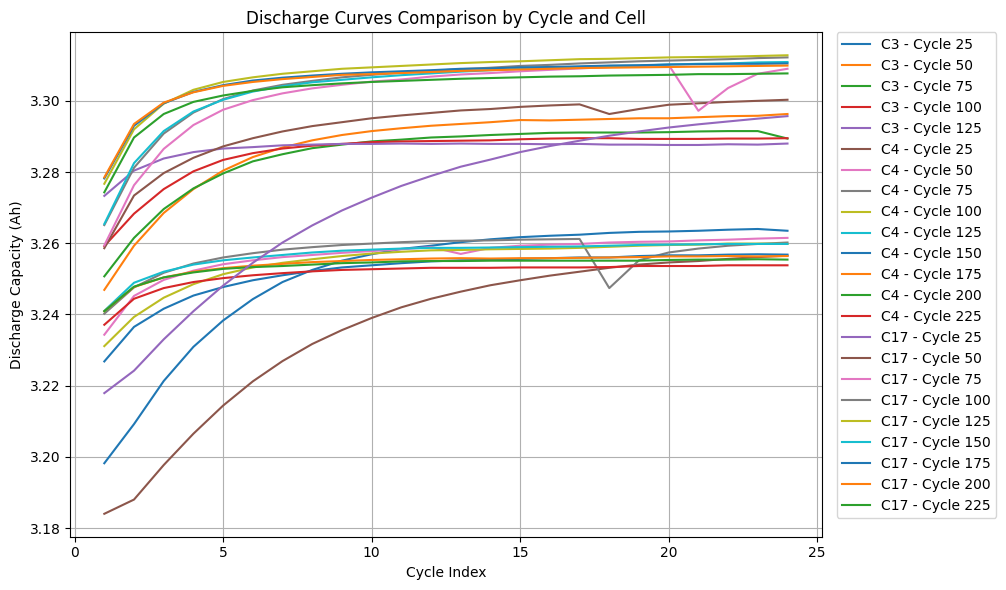

In [ ]:
# Load the comparative files
df_c3 = pd.read_excel('C3_comparativo_por_ciclo.xlsx')
df_c4 = pd.read_excel('C4_comparativo_por_ciclo.xlsx')
df_c17 = pd.read_excel('C17_comparativo_por_ciclo.xlsx')

# Create the figure
plt.figure(figsize=(12, 6))

# Function to plot data from a single cell
def plot_celda(df, celda):
    for col in df.columns:
        if col != 'Cycle Index':
            plt.plot(df['Cycle Index'], df[col], label=f"{celda} - Cycle {col.split('_')[-1]}")

# Plot each cell
plot_celda(df_c3, 'C3')
plot_celda(df_c4, 'C4')
plot_celda(df_c17, 'C17')

# Customize the plot
plt.title('Discharge Curves Comparison by Cycle and Cell')
plt.xlabel('Cycle Index')
plt.ylabel('Discharge Capacity (Ah)')

# Move legend to the right outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar para dejar espacio a la derecha

# Show the plot
plt.show()


# **Data Reshaping for Visualization**
To facilitate the creation of comparative visualizations, we first reshape the datasets from wide format to long format. This transformation allows us to handle the data more efficiently using visualization libraries. Each dataframe corresponding to a cell (C3, C4, and C17) is melted so that each row represents a single capacity value associated with a specific cycle and cell. Finally, the three datasets are combined into one unified dataframe (df_long) for streamlined plotting and analysis.

  *Note:* The pandas.melt() function is used to convert multiple cycle columns into a single variable, which is especially useful for plotting trends across different cycles in a tidy and consistent manner

In [ ]:
# Load the comparative files
df_c3 = pd.read_excel('C3_comparativo_por_ciclo.xlsx')
df_c4 = pd.read_excel('C4_comparativo_por_ciclo.xlsx')
df_c17 = pd.read_excel('C17_comparativo_por_ciclo.xlsx')

# Function to reshape data into long format
def preparar_df(df, celda):
    # Convert from wide to long format using melt
    df_largo = df.melt(id_vars='Cycle Index', var_name='Ciclo', value_name='Capacidad')

    # Extract numerical cycle value from column names and convert to integer
    df_largo['Ciclo'] = df_largo['Ciclo'].str.extract(r'(\d+)', expand=False).astype(int)

    # Add a new column to identify the cell
    df_largo['Celda'] = celda

    return df_largo

# Apply transformation to each cell dataset
df_c3_long = preparar_df(df_c3, 'C3')
df_c4_long = preparar_df(df_c4, 'C4')
df_c17_long = preparar_df(df_c17, 'C17')

# Concatenate all long-format dataframes into one
df_long = pd.concat([df_c3_long, df_c4_long, df_c17_long], ignore_index=True)


# **📱Interactive Visualization of Discharge Capacity by Cell and Cycle**
This visualization aims to compare the discharge behavior of each cell (C3, C4, C17) across selected cycles. By faceting the plot by cycle and using different line styles, it becomes easier to identify differences in performance trends.


In [ ]:
# Assign the same line style to all rows
df_long['line_dash'] = 'dash'  # uniform dashed line for all cycles

# Create interactive line plot using Plotly
fig = px.line(
    df_long,
    x='Cycle Index',
    y='Capacidad',  # will relabel below
    color='Celda',
    line_dash='line_dash',
    line_group='Ciclo',
    facet_col='Ciclo',
    facet_col_wrap=2,
    title='Discharge Curves by Cell and Cycle (Interactive)',
    markers=True,
    template='plotly_white',
    color_discrete_map={
        'C3': '#a569bd',
        'C4': '#5499c7',
        'C17': '#e74c3c'
    }
)

# Update axis titles, legend, and hover labels to English
fig.update_layout(
    height=600,
    width=900,
    title_font_size=18,
    legend_title='Cell',
    margin=dict(t=80),
    hovermode='x unified',
    xaxis_title='Cycle Index',
    yaxis_title='Discharge Capacity (Ah)',
)

# Update labels in all subplots (facets)
fig.for_each_annotation(lambda a: a.update(text=f"Cycle {a.text.split('=')[-1]}"))

# Update hover label names
fig.update_traces(
    hovertemplate='<b>Cell</b>: %{legendgroup}<br>' +
                  '<b>Cycle</b>: %{facet_col}<br>' +
                  '<b>Cycle Index</b>: %{x}<br>' +
                  '<b>Discharge Capacity (Ah)</b>: %{y}<extra></extra>'
)

fig.show()


# **📦 Boxplot of Discharge Capacity by Cell and Cycle**
This boxplot allows us to visually compare the distribution of discharge capacities across different cycles for each cell (C3, C4, and C17). It helps detect variability, outliers, and trends. A dashed line indicates the global mean discharge capacity.

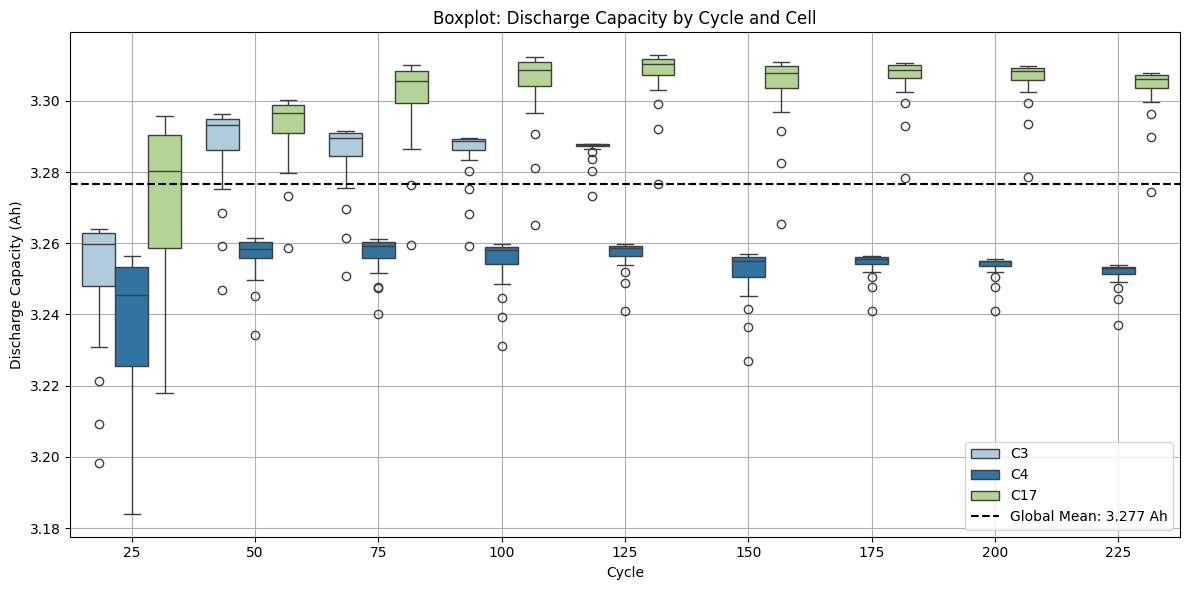

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the comparative files
df_c3 = pd.read_excel('C3_comparativo_por_ciclo.xlsx')
df_c4 = pd.read_excel('C4_comparativo_por_ciclo.xlsx')
df_c17 = pd.read_excel('C17_comparativo_por_ciclo.xlsx')


# Function to transform from wide to long format (for seaborn)
def reformat(df, cell_name):
    df_long = df.drop(columns='Cycle Index').melt(var_name='Cycle', value_name='Capacity')
    df_long['Cycle'] = df_long['Cycle'].str.extract('(\d+)', expand=False).astype(int)  # Extract numeric cycle
    df_long['Cell'] = cell_name
    return df_long

# Reformat all three
c3_long = reformat(df_c3, 'C3')
c4_long = reformat(df_c4, 'C4')
c17_long = reformat(df_c17, 'C17')

# Combine into a single DataFrame
df_all = pd.concat([c3_long, c4_long, c17_long], ignore_index=True)

# Create boxplot with seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x='Cycle', y='Capacity', hue='Cell', palette='Paired')

# Calculate and plot the overall mean as a line
mean_capacity = df_all['Capacity'].mean()
plt.axhline(mean_capacity, color='black', linestyle='--', linewidth=1.5, label=f'Global Mean: {mean_capacity:.3f} Ah')

# Customization
plt.title('Boxplot: Discharge Capacity by Cycle and Cell')
plt.xlabel('Cycle')
plt.ylabel('Discharge Capacity (Ah)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipython-input-39-1551573441.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-39-1551573441.py:23: UserWarning:

The palette list has more values (12) than needed (5), which may not be intended.

/tmp/ipython-input-39-1551573441.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-39-1551573441.py:23: UserWarning:

The palette list has more values (12) than needed (9), which may not be intended.

/tmp/ipython-input-39-1551573441.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-39-1551573441.py:23: UserWarning

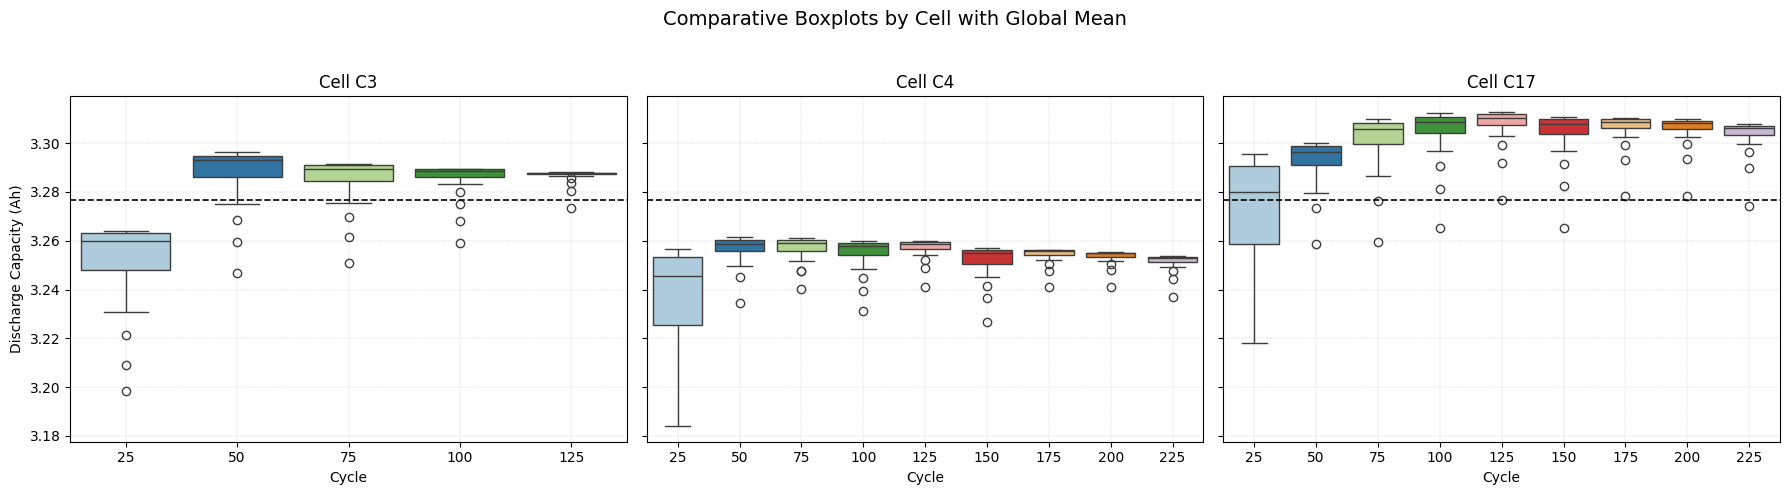

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df_all contains: 'Cell', 'Cycle', 'Capacity'

# Set up the figure with 3 horizontal subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Calculate the global mean for reference line
global_mean = df_all['Capacity'].mean()

# Use the Paired color palette
palette = sns.color_palette('Paired')

# List of cells to plot
cells = ['C3', 'C4', 'C17']

# Generate a boxplot for each cell
for i, cell in enumerate(cells):
    df_cell = df_all[df_all['Cell'] == cell]

    sns.boxplot(data=df_cell, x='Cycle', y='Capacity', ax=axes[i], palette=palette)
    axes[i].axhline(global_mean, color='black', linestyle='--', linewidth=1.2)
    axes[i].set_title(f'Cell {cell}')
    axes[i].set_xlabel('Cycle')
    if i == 0:
        axes[i].set_ylabel('Discharge Capacity (Ah)')
    else:
        axes[i].set_ylabel('')
    axes[i].grid(True, linestyle='--', linewidth=0.3, alpha=0.7)

# Global legend and layout
fig.suptitle('Comparative Boxplots by Cell with Global Mean', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 🧩 Comparative Boxplots of Discharge Capacity
Boxplots summarize the distribution of discharge capacity (Ah) for each cell across all cycles, highlighting variability, median behavior, and outliers.

- **C3** maintains consistent performance with slight fluctuations, generally above the global mean line.
- **C4** shows lower median values and greater spread, suggesting more variability and possibly early signs of capacity fade.
- **C17** presents tightly grouped values above the global mean, suggesting excellent cycle stability.

# **🔍 Correlation Analysis of Discharge Capacity Across Cells and Cycles**
To explore the similarity in discharge behavior across different cells and cycles, we compute the Pearson correlation coefficient between capacity curves for each Cell_Cycle pair (cycles 25, 50, 75, 100, 125).

The Pearson coefficient measures the strength and direction of the linear relationship between two variables. In this context, it allows us to identify:

High similarity (values close to 1) or divergence between discharge trends.

Consistent patterns within or across cells.

Possible anomalies or outliers in specific cycles.

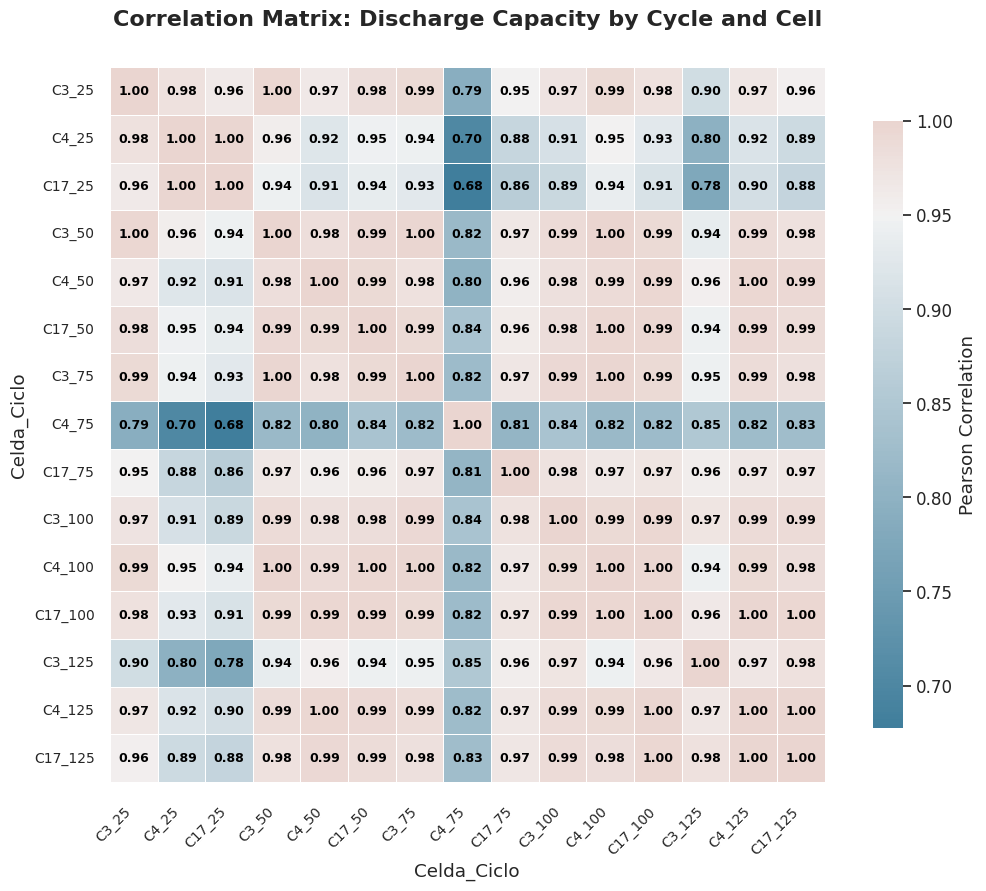

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation between all Cell_Cycle combinations
corr_matrix = df_pivot.corr()

# Reordering for visualization
desired_order = [
    'C3_25', 'C4_25', 'C17_25',
    'C3_50', 'C4_50', 'C17_50',
    'C3_75', 'C4_75', 'C17_75',
    'C3_100', 'C4_100', 'C17_100',
    'C3_125', 'C4_125', 'C17_125'
]

# Keep only columns that exist (in case any are missing)
desired_order = [col for col in desired_order if col in corr_matrix.columns]

# Reorder the matrix
corr_matrix = corr_matrix.loc[desired_order, desired_order]

# Set general style
sns.set_theme(style="white", font_scale=1.1)

# Create figure
plt.figure(figsize=(11, 9))

# Create heatmap with clear pastel diverging palette
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0.95,
    linewidths=0.7,
    square=True,
    annot_kws={"size": 9, "weight": "bold", "color": "black"},
    cbar_kws={"label": "Pearson Correlation", "shrink": 0.85}
)

# Title and customization
plt.title("Correlation Matrix: Discharge Capacity by Cycle and Cell", fontsize=16, weight='bold', pad=30)

# Axis label adjustments
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=5)

# Final layout adjustment
plt.tight_layout()
plt.show()


#**📱Interactive Correlation Matrix with Plotly**

We selected five representative cycles (25, 50, 75, 100, and 125), and for each cell, we created a combined identifier (e.g., `C3_25`). The matrix displays the correlations between all these combinations, providing a compact view of how closely the discharge behaviors of different cells and cycles are aligned.

Hovering over each square reveals the exact Pearson coefficient, while the color gradient helps visually detect strong (closer to 1), weak (closer to 0), or inverse (closer to -1) relationships.

**Interpretation tip:**  
Look for high positive correlations (values near 1) between the same cycles across different cells, as this may suggest consistent behavior under similar conditions. In contrast, low or negative correlations could indicate performance divergence, degradation patterns, or variability in cell behavior over time.

In [ ]:
import plotly.express as px

fig = px.imshow(
    corr_matrix.values,
    labels=dict(x="Variables", y="Variables", color="Pearson Correlation"),
    x=corr_matrix.columns,
    y=corr_matrix.index,
    color_continuous_scale="RdBu",
    # zmin=-1,
    # zmax=1,
    origin='lower',
    text_auto=".2f",
    aspect="auto"
)

fig.update_layout(
    title="Interactive Correlation Matrix",
    title_x=0.5,
    font=dict(family="Arial", size=16),
    width=1000,
    height=850,
    margin=dict(l=120, r=40, t=100, b=100),
    xaxis=dict(tickangle=45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    coloraxis_colorbar=dict(
        title=dict(
            text="Pearson Correlation",
            side="right",  # Vertical orientation
            font=dict(size=16)
        ),
        tickfont=dict(size=12)
    )
)

fig.show()


## 📊 Pearson Correlation Matrix of Capacity per Cycle and Cell

This correlation heatmap displays Pearson correlation coefficients between discharge capacities of all cell-cycle combinations. Pearson’s r (from -1 to 1) measures the linear association between variables.

- Most values are **strongly positive (r ≥ 0.95)**, indicating highly consistent patterns between cycles and cells.
- The **lowest correlations involve C4_75**, suggesting this cycle may deviate from the general trend—possibly due to measurement noise or early degradation.
- Clusters of high correlation, such as between **C17_100 and C17_125**, confirm strong internal consistency within that cell.



The combined visual and statistical analysis reveals clear differences in the performance and stability of the three cells under study:

*   Cell C17 demonstrates the most robust and stable behavior across cycles, with consistently high discharge capacities and strong internal correlations

*   Cell C3 shows relatively stable performance, though slightly below C17.

*   Cell C4 stands out for its lower discharge capacities, greater variability, and reduced correlation in specific cycles, suggesting potential early degradation or instability.

Together, the discharge curve comparison, distribution analysis (boxplots), and correlation matrix provide a understanding of cell behavior, enabling insights into performance consistency, degradation patterns, and possible anomalies.

# **⚙️ Advantages of Using Python Code for This Type of Analysis**

***Reproducibility***

All analyses are transparent and fully reproducible. Anyone with access to the data and code can replicate or audit the results.


***Scalability***

The same code structure can be easily adapted to analyze more cells, additional cycles, or other electrochemical parameters (e.g., internal resistance, energy efficiency).


***Visual Insight + Statistical info***

Combining visualization (matplotlib, seaborn, plotly) with statistical summaries (e.g., Pearson correlation) bridges intuitive understanding and quantitative validation.